In [1]:
# Gerekli Kütüphanelerin Yüklenmesi
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.9.2


In [2]:
# Bu notebook'da fashion mnist kütüphanesi kullanılacaktır
# Toplamda 10 adet sınıf bulunan el yazılarının bulunduğu mnist veri setine benzemektedir
# Data Loading
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Data boyutları ve veri özellikleri incelemesi
print("Train Shape: ", x_train.shape, "\nTest Shape: ", x_test.shape)

Train Shape:  (60000, 28, 28) 
Test Shape:  (10000, 28, 28)


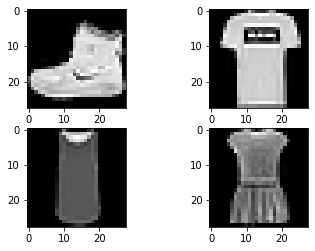

In [11]:
# Ornek veri gösterimleri
fig, ax= plt.subplots(2,2)
ax[0,0].imshow(x_train[0], cmap="gray")
ax[0,1].imshow(x_train[1], cmap="gray")
ax[1,0].imshow(x_train[2], cmap="gray")
ax[1,1].imshow(x_train[3], cmap="gray")

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
# Normalizasyon
x_train, x_test = x_train / 255.0, x_test / 255.0

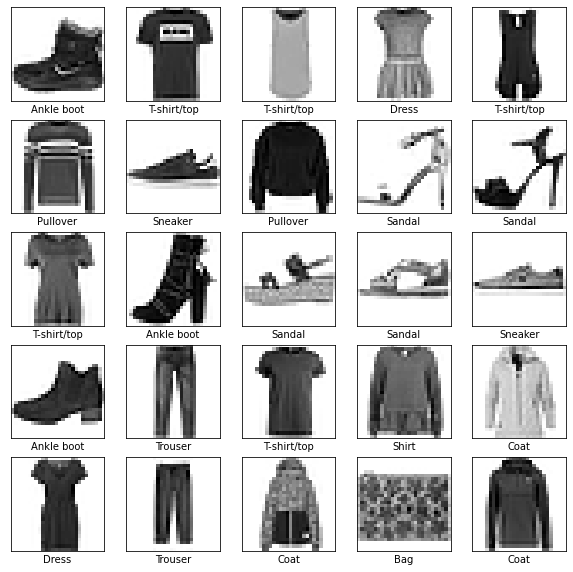

In [17]:
# Etiketler ile birlikte fotoğrafların gösterilmesi
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [18]:
# Model yapısının ve katmanların oluşturulması
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer. Her zaman input shape ilk katmanda belirtilmelidir
    # Flatten katmanında öğrenilen bir parametre yoktur yanlızca verileri yeniden biçimlendirir
    # Örnekte 28x28 olan resimleri 28x28 = 784 olucak şekilde tek boyuta biçimlendirir
    tf.keras.layers.Dense(128, activation="relu"),
    # Pikseller düzleştikten sonra Dense katmanından oluşan bir diziden oluşur.
    # Bunlar yoğun şekilde bağlı veya tamamen bağlı sinir katmanlarıdır.
    # Önrkete ilk Dense katmanında 128 düğüm yada diğer adıyla nöründan oluşur
    tf.keras.layers.Dense(10) # Output Layer, 10 -> sınıf sayısı
    # Output layer bir logits dizisi döndürür. 10 adet nöron vardır ve her nöron ait olduğu sınıfa dair bir değer döndürür. Bir puan içerir.
])

In [21]:
from tensorflow.python import metrics
# Oluşturulan modeli derleme aşaması
"""
Kayıp işlevi —Bu, eğitim sırasında modelin ne kadar doğru olduğunu ölçer. Modeli doğru yöne "yönlendirmek" için bu işlevi en aza indirmek istiyorsunuz.
Optimize Edici — Model, gördüğü verilere ve kayıp işlevine göre bu şekilde güncellenir.
Metrikler —Eğitim ve test adımlarını izlemek için kullanılır. Aşağıdaki örnek, doğru sınıflandırılmış görüntülerin kesri olan doğruluk kullanır.
"""
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [22]:
# Modeli eğitim aşaması
# Basitçe 4 aşama olarak ele alınabilir
"""
Eğitim verilerini modele besleyin. Bu örnekte, eğitim verileri x_train(images) ve y_train(labels) dizilerindedir.
Model, görüntüleri ve etiketleri ilişkilendirmeyi öğrenir.
Modelden bir test seti hakkında tahminler yapmasını istersiniz - bu örnekte x_test dizisi.
Tahminlerin y_test dizisindeki etiketlerle eşleştiğini doğrulayın.
"""
model.fit(x=x_train, y=y_train, epochs=10)
# Fit kelimesi eğitim sırasında modele parametreler uydurulduğu için kullanılmaktadır. Uydurmak anlamına gelmektedir.

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3716 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3340 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2652 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2547 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2446 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy: ", test_acc)

313/313 - 1s - loss: 0.3424 - accuracy: 0.8799 - 591ms/epoch - 2ms/step
Test Accuracy:  0.8798999786376953


In [32]:
# Logit değerleri üzerinden test verilerinden tahminde bulunma
predictions = model.predict(x_test)
len(predictions)

313/313 [==============================] - 1s 2ms/step


10000

In [33]:
predictions[0]

array([ -9.42028  , -19.05739  , -16.452023 , -22.440891 , -14.68436  ,
        -4.013001 , -12.306459 ,   3.0211532,  -7.9116216,   6.046126 ],
      dtype=float32)

In [35]:
# Modelin daha iyi yorumlanabilir olasılıklar olması için ek olarak bir softmax katmanı eklendi
prob_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [36]:
# Yeni tahmin değerleri
predictions = prob_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [37]:
# Tahmin veri setimizdeki çıkış katmanındaki sayı kadardır.
# Her bir sayı o katmanın temsil ettiği sınıfa ait güveni gösterir
predictions[0]

array([1.8298448e-07, 1.1941823e-11, 1.6164692e-10, 4.0516771e-13,
       9.4678931e-10, 4.0809911e-05, 1.0208517e-08, 4.6308424e-02,
       8.2721090e-07, 9.5364988e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
# İlk tahmin ettiğimiz görsel 9 numaralı etikete ait olduğu tahmin edilmiştir
class_names[9]

'Ankle boot'

In [47]:
# Tahmin ile gerçek değeri kıyaslayalım
if(np.argmax(predictions[0]) == y_test[0]):
  print("Tahmin doğrudur: {}".format(class_names[y_test[0]]))
else:
  print("Yanlış tahmin")

Tahmin doğrudur: Ankle boot


In [60]:
def plot_image(i, predictions_array, true_label, img):
  """
  Tahmin sonuçlarını görsel ile birlikte çizdiren fonksiyon
  param i: Tahmin indisi
  param predictions_array: Görsele ait tahmin dizisi
  param true_label: Görsele ait doğru tahminin bulunduğu veri seti
  param img: Görselin bulunduğu veri seti
  """
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

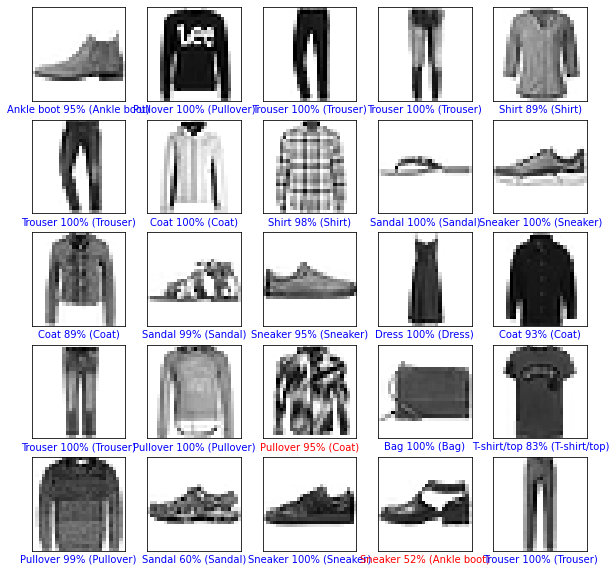

In [61]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plot_image(i, predictions[i], y_test, x_test)
# Kırmızı olanlar yanlış tahminler

In [62]:
# Eğitilmiş modelin kullanılması
# "tf.keras" modelleri, bir kerede bir toplu iş veya örnek koleksiyonu üzerinde tahminler yapmak için optimize edilmiştir. 
# Buna göre, tek bir görsel kullanıyor olsanız bile, onu bir listeye eklemeniz gerekiyor
img = x_test[1] # Rastgele seçilmiş bir test verisi
img.shape

(28, 28)

In [63]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [64]:
# Tek bir görsel kullansak bile listeye ekleyerek tahminde bulunmamız gerekiyor
prediction_single = prob_model.predict(img)

1/1 [==============================] - 0s 33ms/step


In [65]:
prediction_single

array([[3.6761514e-06, 5.5846636e-13, 9.9543577e-01, 6.9909633e-13,
        4.1923579e-03, 2.3383742e-15, 3.6827102e-04, 1.4214784e-18,
        3.1383736e-11, 1.0159256e-14]], dtype=float32)

In [73]:
print("Tahmin edilen sınıf: {} Sınıf Numarası: {}".format(class_names[np.argmax(prediction_single)], np.argmax(prediction_single)))

Tahmin edilen sınıf: Pullover Sınıf Numarası: 2


In [ ]:
-